In [ ]:
 # run this if you are running the notebook on colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# run this only if you haven't downloaded the csv file manually
import pandas as pd

exoplanets_csv = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv'
exoplanets_tables = pd.read_csv(exoplanets_csv)

In [2]:
# run this if you are using the downloaded csv file
import pandas as pd
file_path  = 'planets.csv' # enter your exoplanet path here

In [3]:
df = pd.read_csv(file_path) #load the exoplanets database

/var/folders/2k/y0frjbpd72b2wm1xl95d3kdw0000gn/T/ipykernel_27991/2153841392.py:1: DtypeWarning: Columns (4,5,51,66,149,154,184,188,207,212,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path) #load the exoplanets database


In [4]:
ra = df['sky_coord.ra']  # right ascension
dec = df['sky_coord.dec'] # declination
dist = df['sy_dist'] # distance
mag = df['sy_kmagerr2'] #host star brightness

mag_min = mag.min()
mag_max = mag.max()

In [17]:
#to print the column names of the exoplanets table
for colName in df.columns:
    print(colName,end=" | ")

Unnamed: 0 | pl_name | pl_letter | hostname | hd_name | hip_name | tic_id | gaia_id | default_flag | pl_refname | sy_refname | disc_pubdate | disc_year | discoverymethod | disc_locale | disc_facility | disc_instrument | disc_telescope | disc_refname | ra | rastr | dec | decstr | glon | glat | elon | elat | pl_orbper | pl_orbpererr1 | pl_orbpererr2 | pl_orbperlim | pl_orbperstr | pl_orblpererr1 | pl_orblper | pl_orblpererr2 | pl_orblperlim | pl_orblperstr | pl_orbsmax | pl_orbsmaxerr1 | pl_orbsmaxerr2 | pl_orbsmaxlim | pl_orbsmaxstr | pl_orbincl | pl_orbinclerr1 | pl_orbinclerr2 | pl_orbincllim | pl_orbinclstr | pl_orbtper | pl_orbtpererr1 | pl_orbtpererr2 | pl_orbtperlim | pl_orbtperstr | pl_orbeccen | pl_orbeccenerr1 | pl_orbeccenerr2 | pl_orbeccenlim | pl_orbeccenstr | pl_eqt | pl_eqterr1 | pl_eqterr2 | pl_eqtlim | pl_eqtstr | pl_occdep | pl_occdeperr1 | pl_occdeperr2 | pl_occdeplim | pl_occdepstr | pl_insol | pl_insolerr1 | pl_insolerr2 | pl_insollim | pl_insolstr | pl_dens | pl_den

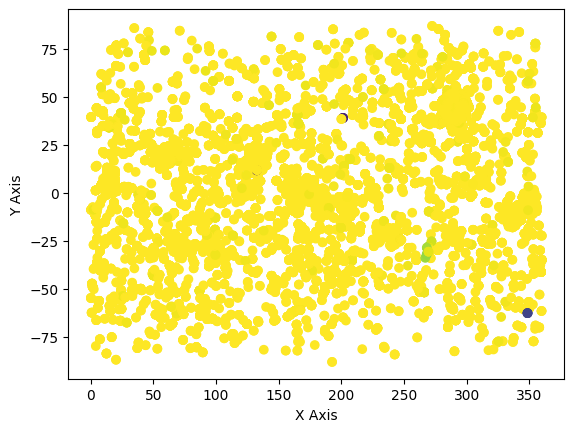

In [5]:
#run this to visualize the host star brightness of the exoplanets
import matplotlib.pyplot as plt

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(ra, dec,c=mag, marker='o')

# Set labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

# Show the plot
plt.show()


Text(0.5, 0, 'Right Ascension')

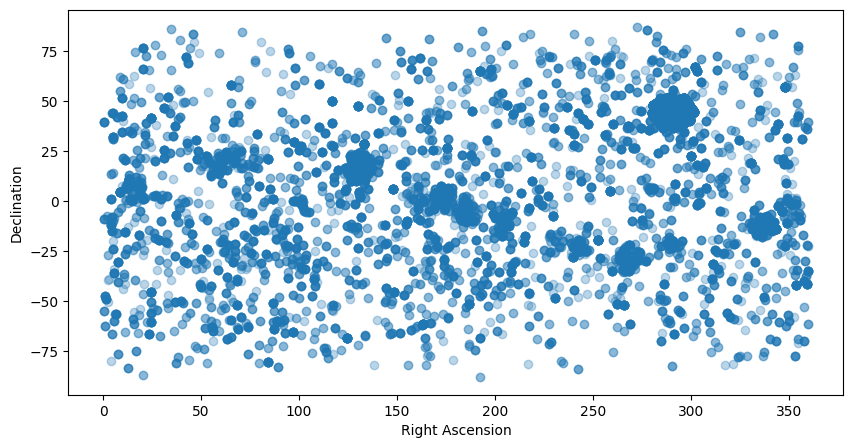

In [6]:
#run this to visualize the density of the exoplanets in the celstial sphere with x=ra and y=dec
plt.figure(figsize=(10, 5))
plt.scatter(ra,dec, alpha=0.3)

plt.ylabel('Declination')
plt.xlabel('Right Ascension')

In [20]:
import numpy as np

image_height = 5 # in matplotlib units
aspect_ratio = 2 # aspect ratio of the image

ra_test = np.array([0,180,0,180,90])
dec_test = np.array([0,0,90,0,45])

cylindrical_ra = (np.sqrt(aspect_ratio*np.pi)*(ra))/180
cylindrical_dec = np.sin((dec*np.pi)/180)/np.sqrt(aspect_ratio/np.pi)

# print(cylindrical_ra)
# print(cylindrical_dec)

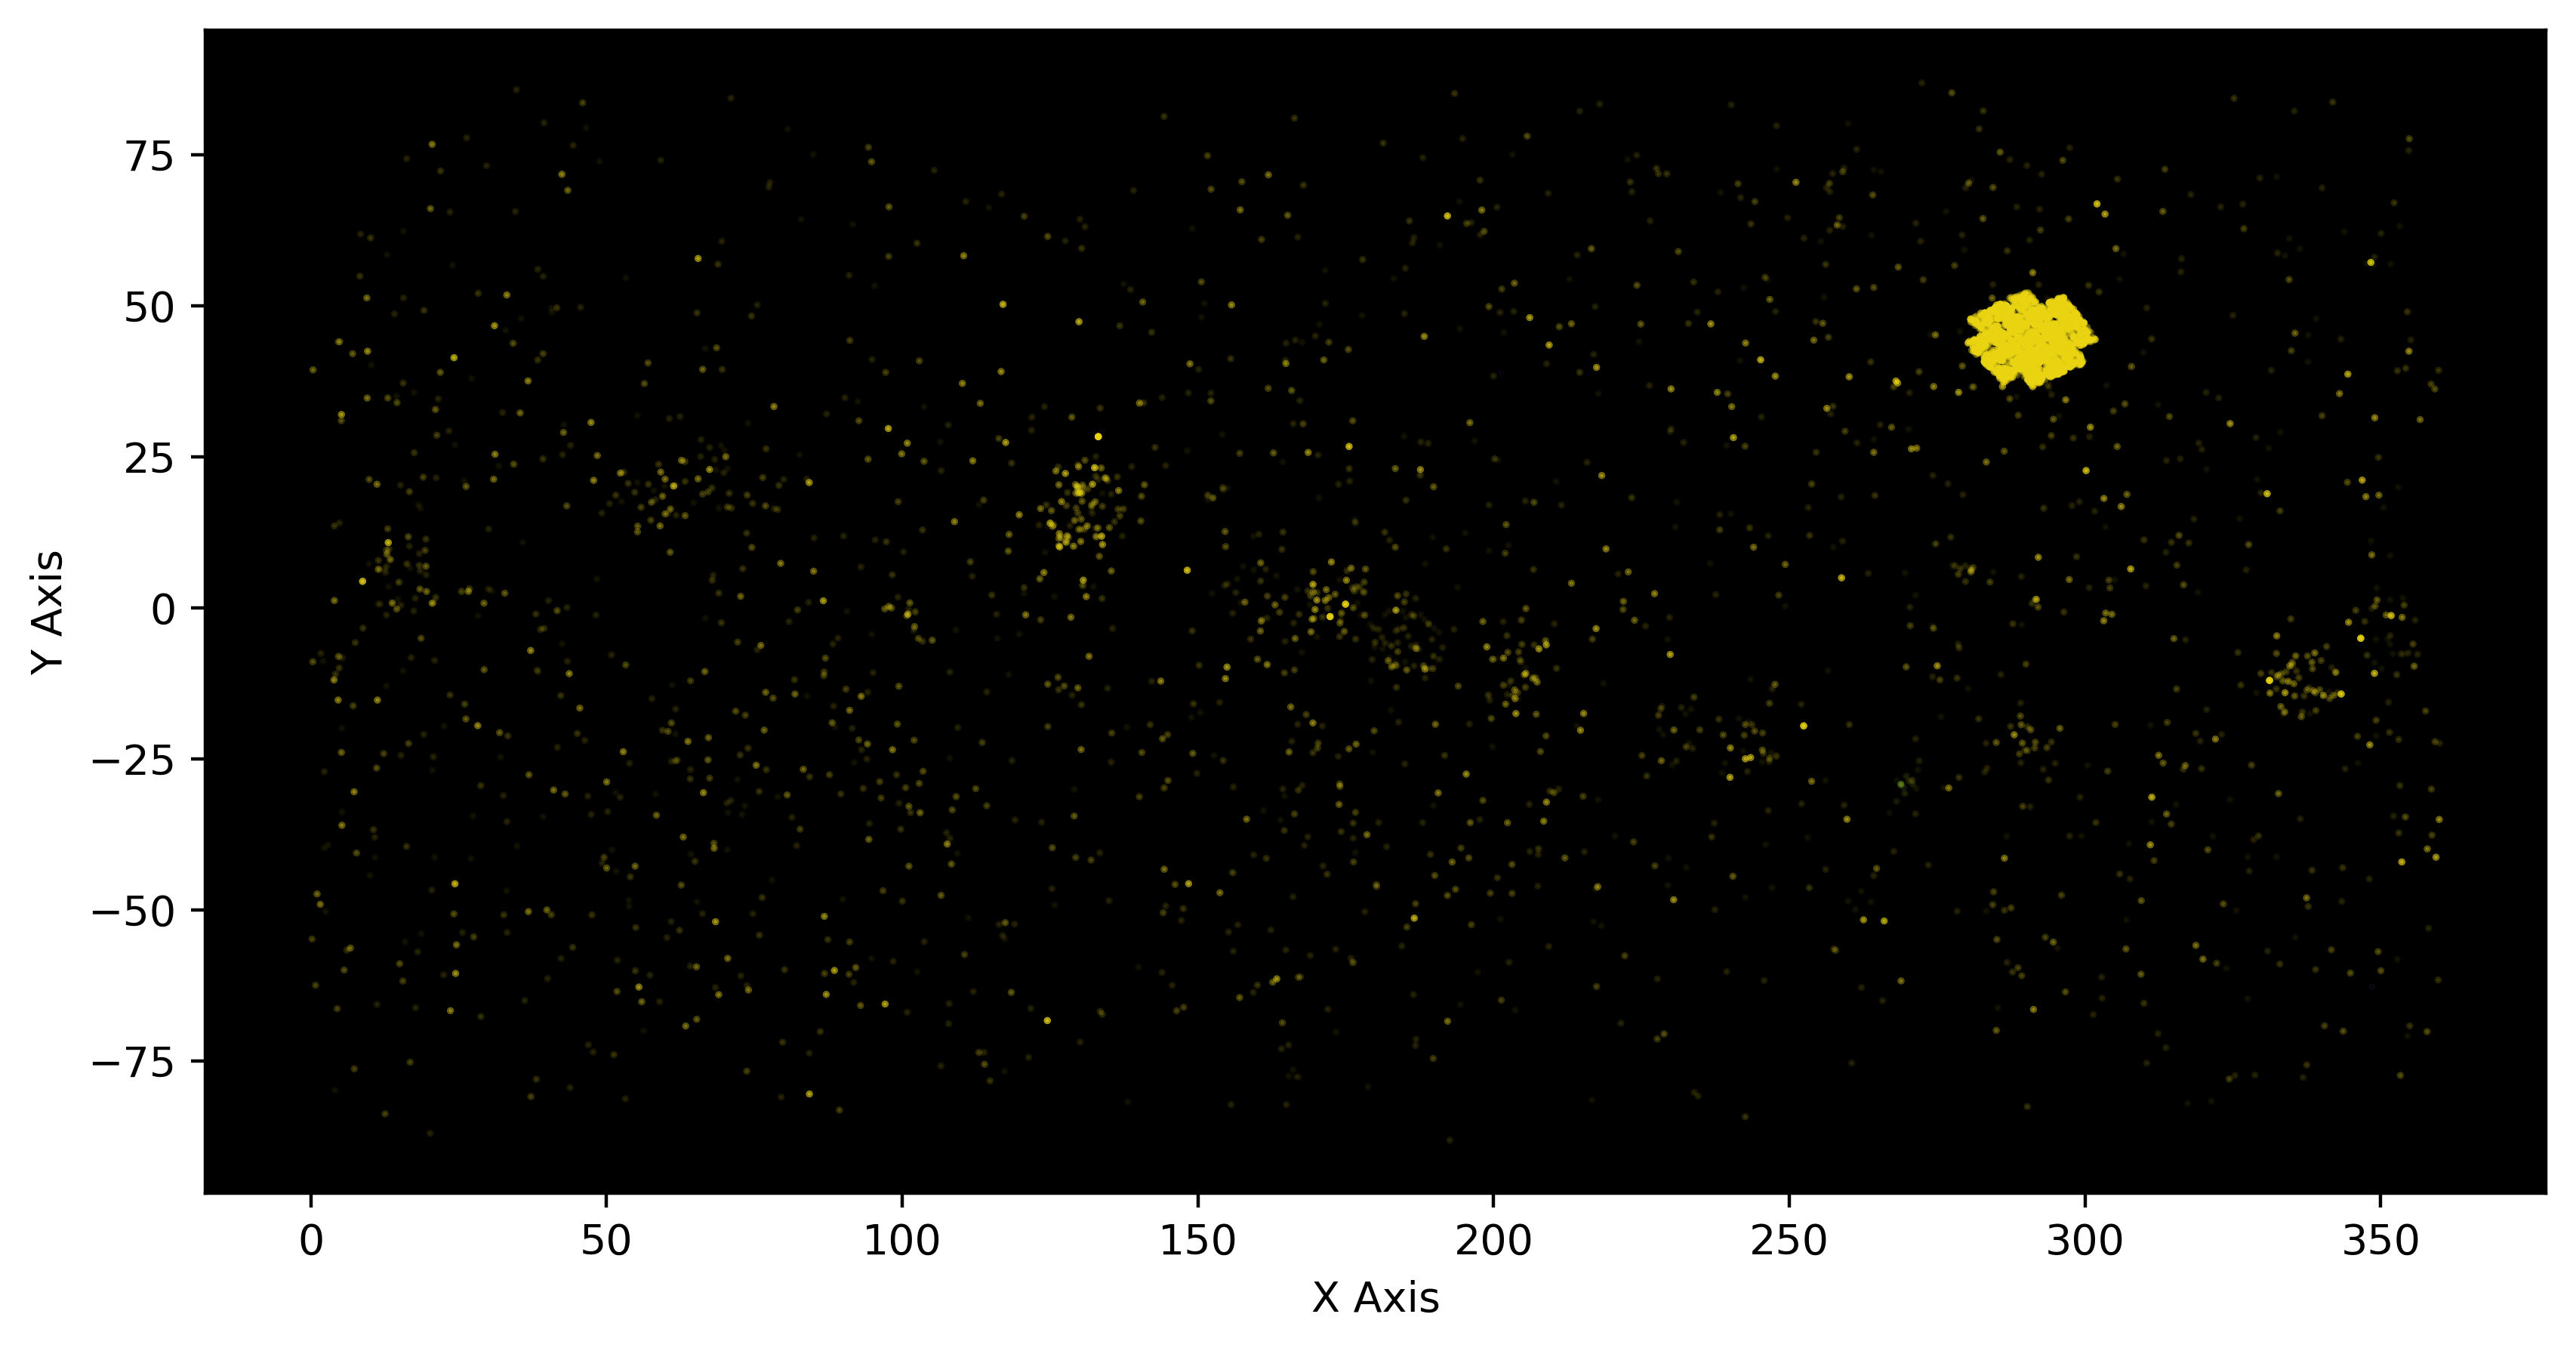

<Figure size 640x480 with 0 Axes>

In [24]:
# for cylindrical projection reference
import matplotlib.pyplot as plt

# Create the plot
fig = plt.figure(figsize=(image_height*aspect_ratio,image_height),dpi=400)
ax = fig.add_subplot(111)

marker_size = 2

normalized_mag = (mag-mag_min)/(mag_max-mag_min)*marker_size

# Scatter plot
ax.scatter(ra, dec,c=mag, marker='.',s=normalized_mag,alpha=0.05)
ax.set_facecolor("black")

# Set labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

# Show the plot
plt.show()
plt.savefig("ra_dec.png")

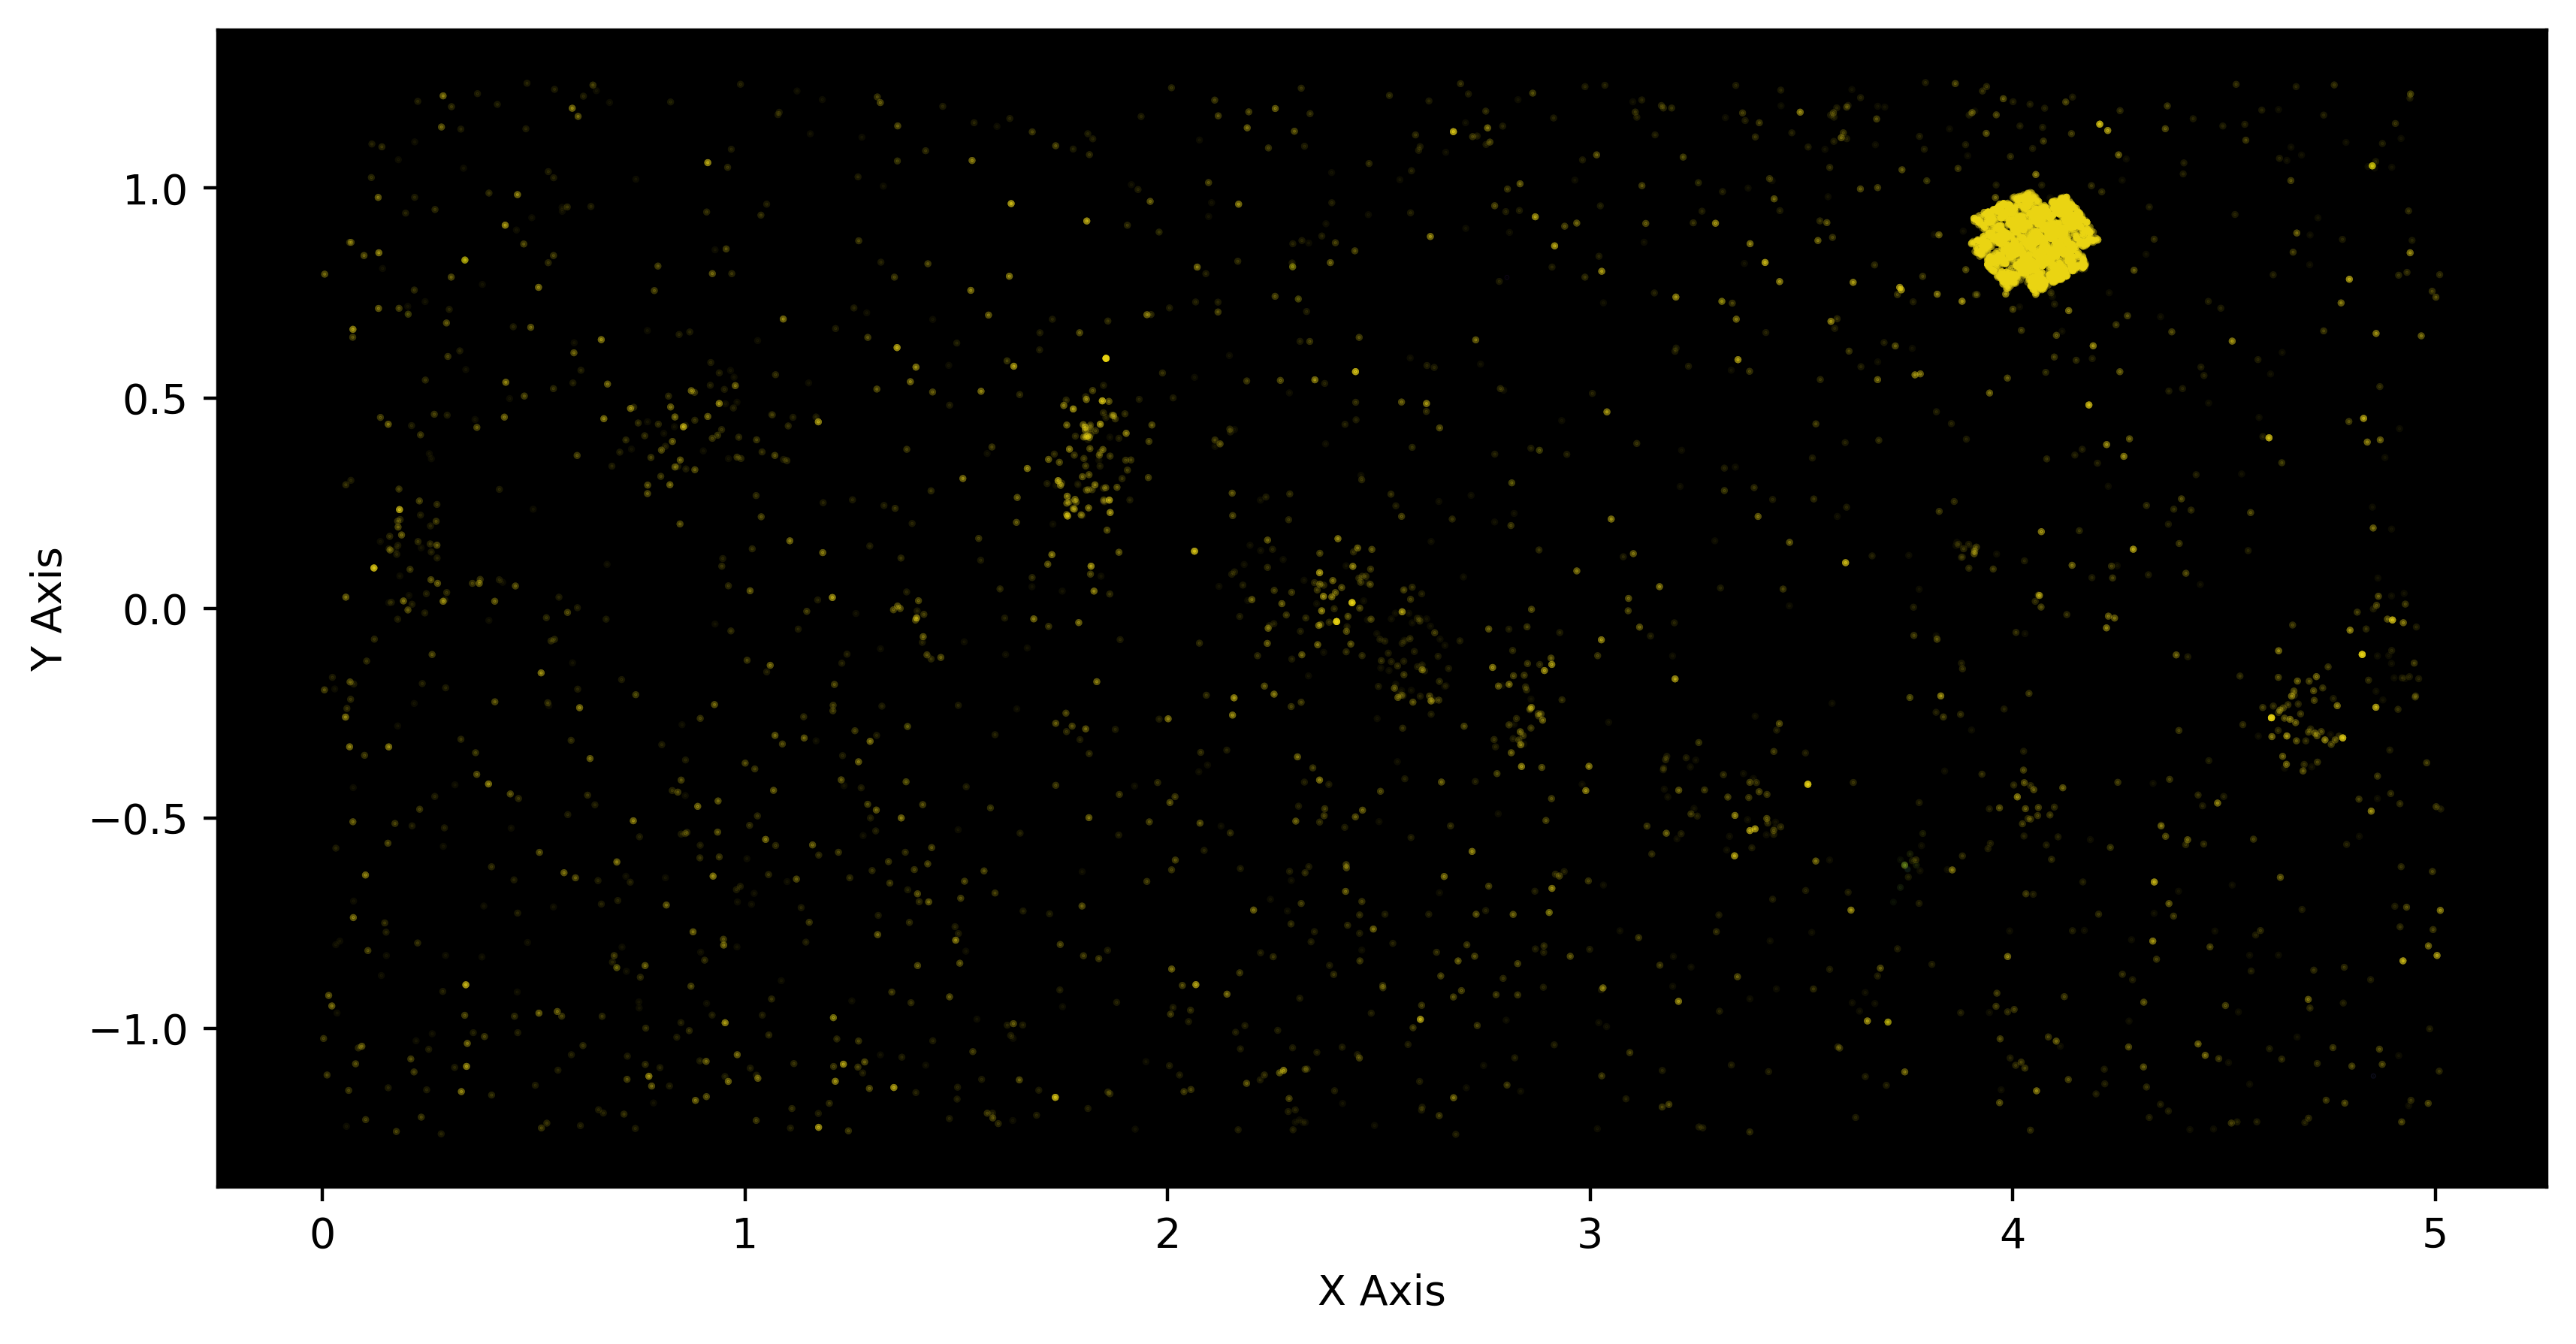

<Figure size 640x480 with 0 Axes>

In [25]:
# cylindrical projection of the celestial # working correctly
import matplotlib.pyplot as plt

# Create the plot
fig = plt.figure(figsize=(image_height*aspect_ratio,image_height),dpi=400)
ax = fig.add_subplot(111)

marker_size = 2

normalized_mag = (mag-mag_min)/(mag_max-mag_min)*marker_size

# Scatter plot
ax.scatter(cylindrical_ra, cylindrical_dec,c=mag, marker='.',s=normalized_mag,alpha=0.05)
ax.set_facecolor("black")

# Set labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

# Show the plot
plt.show()
plt.savefig("cylindrical.png")


In [ ]:
# List of specific columns you want to keep ######## to-do
columns_to_keep = ['ra', 'dec', 'sy_dist']

# Create a new DataFrame with only the selected columns
filtered_cols_exoplanets_tables = exoplanets_tables[columns_to_keep]

# Display the new DataFrame
filtered_cols_exoplanets_tables.head()


In [ ]:
# check the ranges of columns

print(ra.min(), " - ",ra['ra'].max())
print(dec['dec'].min(), " - ",dec['dec'].max())
print(dist['sy_dist'].min(), " - ",dist['sy_dist'].max())


In [ ]:
# Drop any rows where 'sy_dist' is missing (optional but recommended)
df = df_selected.dropna(subset=['sy_dist'])

# Plot the histogram for the 'sy_dist' column
plt.figure(figsize=(8,6))
plt.hist(df['sy_dist'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Set the labels and title
plt.xlabel('Distance (Parsecs)')
plt.ylabel('Frequency')
plt.title('Distribution of Star Distances (sy_dist)')

# Show the plot
plt.show()


In [ ]:
# Define the range for filtering
min_distance = 0
max_distance = 4000

# Filter the DataFrame
filtered_df = df[(df['sy_dist'] >= min_distance) & (df['sy_dist'] <= max_distance)]

# Display the filtered DataFrame
print(filtered_df.head())


In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(filtered_df['ra'], filtered_df['dec'], filtered_df['sy_dist'], c=filtered_df['sy_dist'], cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.show()
